# Lab work #3
# Lypnytska Inna
# CS32
# Task:
1. Do data preprocessing & data visualization as it was in the 1st lab work
2. Solve classification problem for the selected dataset.
3. Use examples/fisher_irises.ipynb as baseline for your experiments
4. Try to optimize hyperparameters of some model


# Datasets for classification
1. [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)
2. [Fetal Health Classification](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
3. [Glass Classification](https://www.kaggle.com/datasets/uciml/glass)
4. [Gender Classification Dataset](https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)
5. [Weather Type Classification](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)
6. [Star Type Classification / NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification)
7. [Happiness Classification Dataset](https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset)
8. [NASA: Asteroids Classification
Data Collected from NASA API](https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification)
9. [CS:GO Round Winner Classification](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification)
10. [Heart Disease Classification Dataset](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset)
11. [Early Classification of Diabetes](https://www.kaggle.com/datasets/andrewmvd/early-diabetes-classification)
12. [Credit Risk Classification Dataset](https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Завантаження даних
df = pd.read_csv("csgo_round_snapshots.csv")

# Перетворення цільової змінної в числа
df['round_winner'] = df['round_winner'].map({'CT': 0, 'T': 1})

# Вибірка 10 000 випадкових рядків (через обмеження пам’яті)
df_sample = df.sample(n=10000, random_state=42)

# Поділ на ознаки і цільову змінну
X = df_sample.drop(columns=['round_winner'])
y = df_sample['round_winner']

# Визначення числових і категоріальних колонок
categorical_cols = ['map']
numerical_cols = X.drop(columns=categorical_cols).columns.tolist()

# Побудова пайплайну для попередньої обробки
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Розбиття на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Логістична регресія
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Випадковий ліс
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Навчання моделей
logreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['time_left', 'ct_score',
                                                   't_score', 'bomb_planted',
                                                   'ct_health', 't_health',
                                                   'ct_armor', 't_armor',
                                                   'ct_money', 't_money',
                                                   'ct_helmets', 't_helmets',
                                                   'ct_defuse_kits',
                                                   'ct_players_alive',
                                                   't_players_alive',
                                                   'ct_weapon_ak47',
                                                   't_weapon_ak47',
                                                   'ct_weapon_aug',
                                                   't_weapon_aug',
                                                   'ct_weapon_awp',
                                                   't_weapon_awp',
                                                   'ct_weapon_bizon',
                                                   't_weapon_bizon',
                                                   'ct_weapon_cz75auto',
                                                   't_weapon_cz75auto',
                                                   'ct_weapon_elite',
                                                   't_weapon_elite',
                                                   'ct_weapon_famas',
                                                   't_weapon_famas',
                                                   'ct_weapon_g3sg1', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['map'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Logistic Regression Accuracy: 0.7465
Random Forest Accuracy: 0.7785


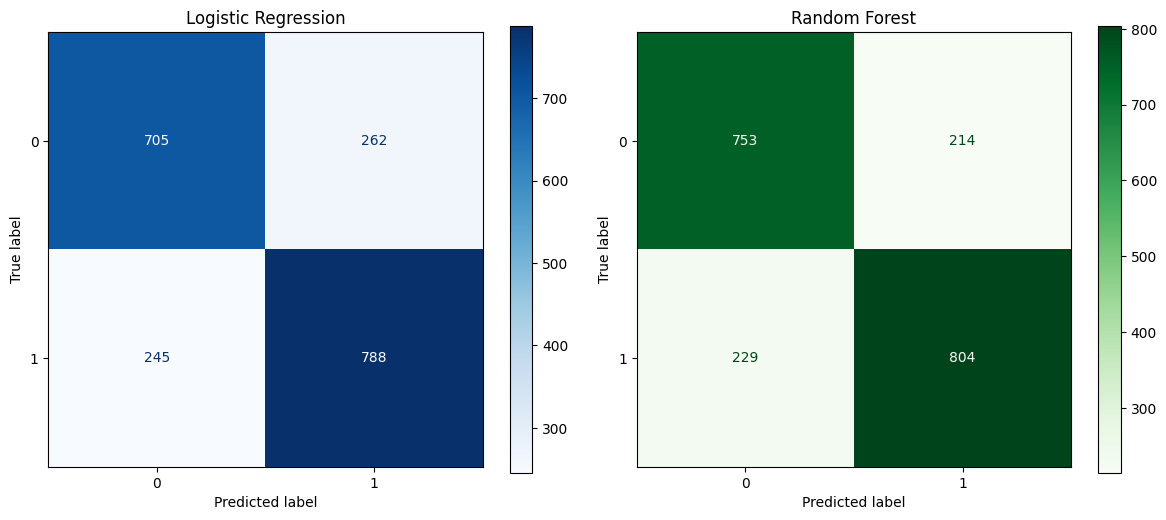

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Прогнози
logreg_preds = logreg_pipeline.predict(X_test)
rf_preds = rf_pipeline.predict(X_test)

# Точність
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Матриці помилок
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, logreg_preds, ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, ax=axes[1], cmap='Greens')
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

# Параметри для підбору
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [5, 10, None]
}

# Пайплайн із препроцесором і RandomForest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# GridSearchCV
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Найкращі параметри
print("Найкращі параметри:", grid_search.best_params_)

# Оцінка на тестовій вибірці
best_model = grid_search.best_estimator_
print("Точність на тесті:", accuracy_score(y_test, best_model.predict(X_test)))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Найкращі параметри: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Точність на тесті: 0.7785
